In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Data Loading

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Water_Consumption_And_Cost__2013_-_Feb_2023_.csv")

In [4]:
data.head()

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Service End Date,Number of days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (HCF),Water&Sewer Charges,Other Charges
0,BAISLEY PARK,QUEENS,BAISLEY PARK,BLD 09,AMR,BLD 09,91.0,240,Q009100,FEDERAL,...,1/26/2020,34.0,K13060723,N,196.35,Basic Water and Sewer,Yes,19,196.35,0.0
1,BAISLEY PARK,QUEENS,BAISLEY PARK,BLD 09,AMR,BLD 09,91.0,240,Q009100,FEDERAL,...,2/24/2020,29.0,K13060723,N,258.35,Basic Water and Sewer,Yes,25,258.35,0.0
2,BAISLEY PARK,QUEENS,BAISLEY PARK,BLD 09,AMR,BLD 09,91.0,240,Q009100,FEDERAL,...,3/23/2020,28.0,K13060723,N,217.02,Basic Water and Sewer,Yes,21,217.02,0.0
3,BAISLEY PARK,QUEENS,BAISLEY PARK,BLD 09,AMR,BLD 09,91.0,240,Q009100,FEDERAL,...,4/23/2020,31.0,K13060723,N,103.34,Basic Water and Sewer,Yes,10,103.34,0.0
4,BAY VIEW,BROOKLYN,BAY VIEW,BLD 25 - Community Center,NONE,Community Center,92.0,670,K209200,MIXED FINANCE/LLC1,...,1/26/2020,34.0,E17250205,N,72.34,Basic Water and Sewer,Yes,7,72.34,0.0


# **Aim 1: Seasonal Consumption**

Data Cleaning


In [5]:
df=data[["Revenue Month","Consumption (HCF)"]]
df["Revenue Month"]=pd.to_datetime(df["Revenue Month"])
df

<ipython-input-5-616f00d4ef44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Revenue Month"]=pd.to_datetime(df["Revenue Month"])


,Revenue Month,Consumption (HCF)
0,2020-01-01,19
1,2020-02-01,25
2,2020-03-01,21
3,2020-04-01,10
4,2020-01-01,7
...,...,...
50310,2022-09-01,204
50311,2022-12-01,204
50312,2022-02-01,204
50313,2022-02-01,204


In [6]:
# any(df["Revenue Year"].isnull())  For checking nan values are there or not

Data Manipulation

In [6]:
df["Revenue Year"]=df["Revenue Month"].dt.year
df

<ipython-input-6-00376a891600>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Revenue Year"]=df["Revenue Month"].dt.year


,Revenue Month,Consumption (HCF),Revenue Year
0,2020-01-01,19,2020
1,2020-02-01,25,2020
2,2020-03-01,21,2020
3,2020-04-01,10,2020
4,2020-01-01,7,2020
...,...,...,...
50310,2022-09-01,204,2022
50311,2022-12-01,204,2022
50312,2022-02-01,204,2022
50313,2022-02-01,204,2022


In [7]:
var=[]
for i in (df["Revenue Month"]):
  month=i.month
  if month==3 or month==4 or month==5:
    var.append("Spring")
  elif month==6 or month==7 or month==8:
    var.append("Summer")
  elif month==9 or month==10 or month==11:
    var.append("Fall")
  elif month==12 or month==1 or month==2:
    var.append("Winter")
df["Season"]=var
df

<ipython-input-7-dd4c5c7f3010>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Season"]=var


,Revenue Month,Consumption (HCF),Revenue Year,Season
0,2020-01-01,19,2020,Winter
1,2020-02-01,25,2020,Winter
2,2020-03-01,21,2020,Spring
3,2020-04-01,10,2020,Spring
4,2020-01-01,7,2020,Winter
...,...,...,...,...
50310,2022-09-01,204,2022,Fall
50311,2022-12-01,204,2022,Winter
50312,2022-02-01,204,2022,Winter
50313,2022-02-01,204,2022,Winter


Data Analysis

In [8]:
df_pivot = pd.pivot_table(df,	values="Consumption (HCF)",	index="Revenue Year",
                          columns="Season",	aggfunc=np.sum)
df_pivot

Season,Fall,Spring,Summer,Winter
Revenue Year,,,,
2013,316369.0,364657.0,370562.0,330383.0
2014,299387.0,292087.0,308885.0,351962.0
2015,239268.0,268741.0,349692.0,276732.0
2016,233784.0,234791.0,275306.0,219041.0
2017,244229.0,219761.0,286309.0,246953.0
2018,197656.0,256396.0,243725.0,237837.0
2019,764525.0,377597.0,422145.0,368030.0
2020,176445.0,266104.0,231294.0,281798.0
2021,211165.0,180782.0,203930.0,321949.0


Data Visualisation

<Axes: title={'center': 'Seasonal Consumption'}, xlabel='Revenue Year', ylabel='Consumption (HCF)'>

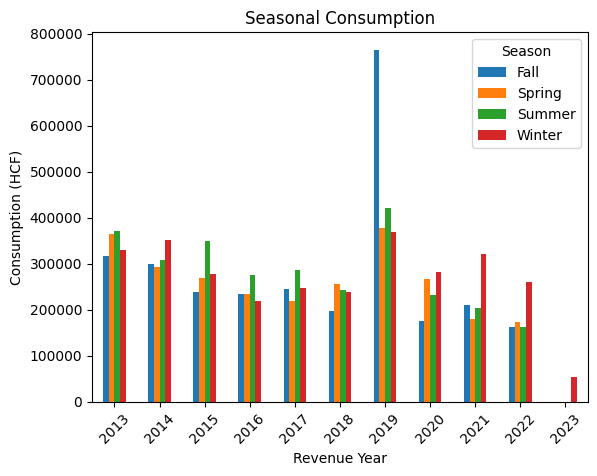

In [9]:
df_pivot.plot(kind="bar",title="Seasonal Consumption",ylabel="Consumption (HCF)",rot=45)

# **Aim 2: Identify Consumption Percentage of Boroughs**

Data Cleaning

In [10]:
df1=data[["Borough","Consumption (HCF)"]]
df1

,Borough,Consumption (HCF)
0,QUEENS,19
1,QUEENS,25
2,QUEENS,21
3,QUEENS,10
4,BROOKLYN,7
...,...,...
50310,BRONX,204
50311,BRONX,204
50312,BROOKLYN,204
50313,BROOKLYN,204


Data Manipulation

In [11]:
df1=pd.DataFrame(df1.groupby("Borough")["Consumption (HCF)"].sum())
df1.reset_index(inplace=True)
df1

,Borough,Consumption (HCF)
0,BRONX,1994448
1,BROOKLYN,2596560
2,FHA,555432
3,MANHATTAN,3603515
4,NON DEVELOPMENT FACILITY,3301
5,QUEENS,2525442
6,STATEN ISLAND,6507


Data Visualisation

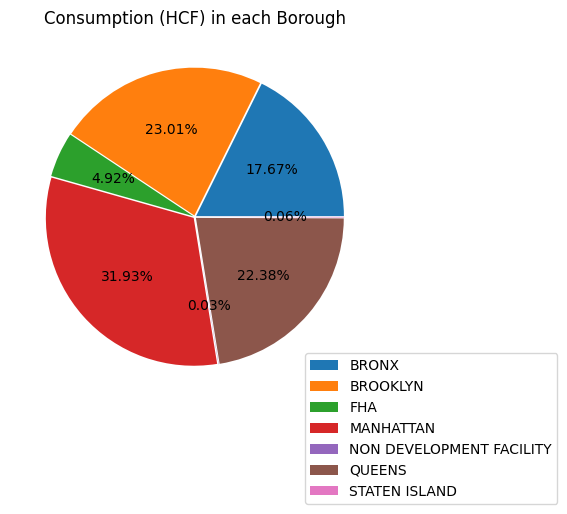

In [12]:
plt.title("Consumption (HCF) in each Borough")
plt.pie(df1["Consumption (HCF)"],explode=(0.01,0.01,0.01,0.01,0.01,0.01,0.01),autopct='%1.2f%%', radius=1)
plt.legend(df1["Borough"], bbox_to_anchor=(1.5,0.15))
plt.show()

array([<Axes: ylabel='Consumption (HCF)'>], dtype=object)

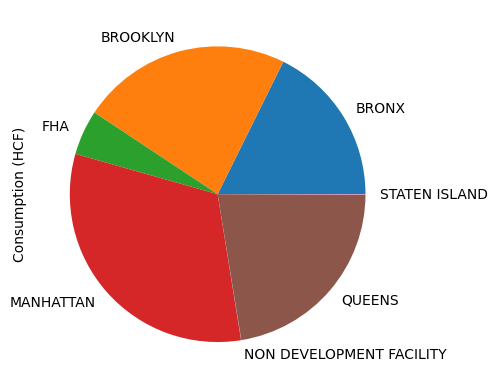

In [13]:
df2=df1.set_index("Borough")
df2.plot(kind="pie",subplots=True,legend=False)

# **Aim 3: Time Series for Revenue Month**

Data Cleaning

In [14]:
df1=data[["Revenue Month","Consumption (HCF)"]]
df1

,Revenue Month,Consumption (HCF)
0,2020-01,19
1,2020-02,25
2,2020-03,21
3,2020-04,10
4,2020-01,7
...,...,...
50310,2022-09,204
50311,2022-12,204
50312,2022-02,204
50313,2022-02,204


Data Manipulation

In [15]:
df1["Revenue Month"]=pd.to_datetime(df1["Revenue Month"])
df1

<ipython-input-15-5cb171ca2697>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Revenue Month"]=pd.to_datetime(df1["Revenue Month"])


,Revenue Month,Consumption (HCF)
0,2020-01-01,19
1,2020-02-01,25
2,2020-03-01,21
3,2020-04-01,10
4,2020-01-01,7
...,...,...
50310,2022-09-01,204
50311,2022-12-01,204
50312,2022-02-01,204
50313,2022-02-01,204


In [18]:
monthly_data = df1.set_index('Revenue Month').resample('y').sum()
monthly_data.reset_index(inplace=True)
monthly_data=monthly_data[:-1]
monthly_data

,Revenue Month,Consumption (HCF)
0,2013-12-31,1381971
1,2014-12-31,1252321
2,2015-12-31,1134433
3,2016-12-31,962922
4,2017-12-31,997252
5,2018-12-31,935614
6,2019-12-31,1932297
7,2020-12-31,955641
8,2021-12-31,917826
9,2022-12-31,760256


Data Visualisation

<Axes: title={'center': 'Time Series Analysis'}, xlabel='Revenue Year', ylabel='Consumption(HCF)'>

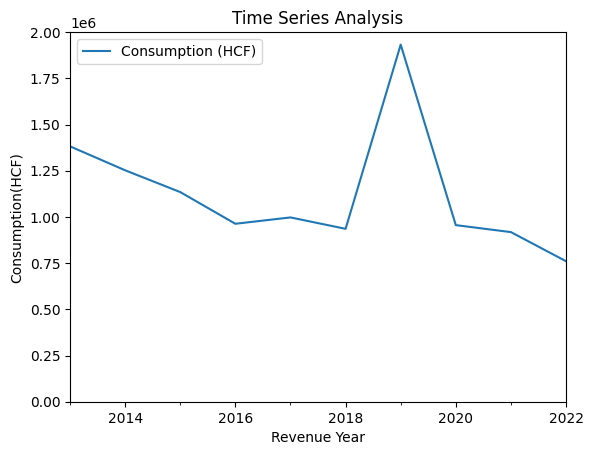

In [19]:
monthly_data.plot("Revenue Month","Consumption (HCF)",xlabel="Revenue Year",
                  ylabel="Consumption(HCF)",title="Time Series Analysis",ylim=[0,2000000])